In [61]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

### Read the input file and check the data dimension

In [2]:
gc = pd.read_csv("german_credit.csv")

In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

gc.shape

(1000, 21)

In [6]:
gc.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
gc.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [22]:
x = gc.drop(['default'],axis=1)
y = gc[['default']]

print(x.shape)
print(y.shape)

(1000, 20)
(1000, 1)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 20)
(500, 20)
(500, 1)
(500, 1)


# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [47]:
gc1 = pd.get_dummies(gc, drop_first=True)

In [48]:
# Print Shape of model data
gc1.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [50]:
gc1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


Its very difficult to read above 48*48 matrix, lets try plotting heat map

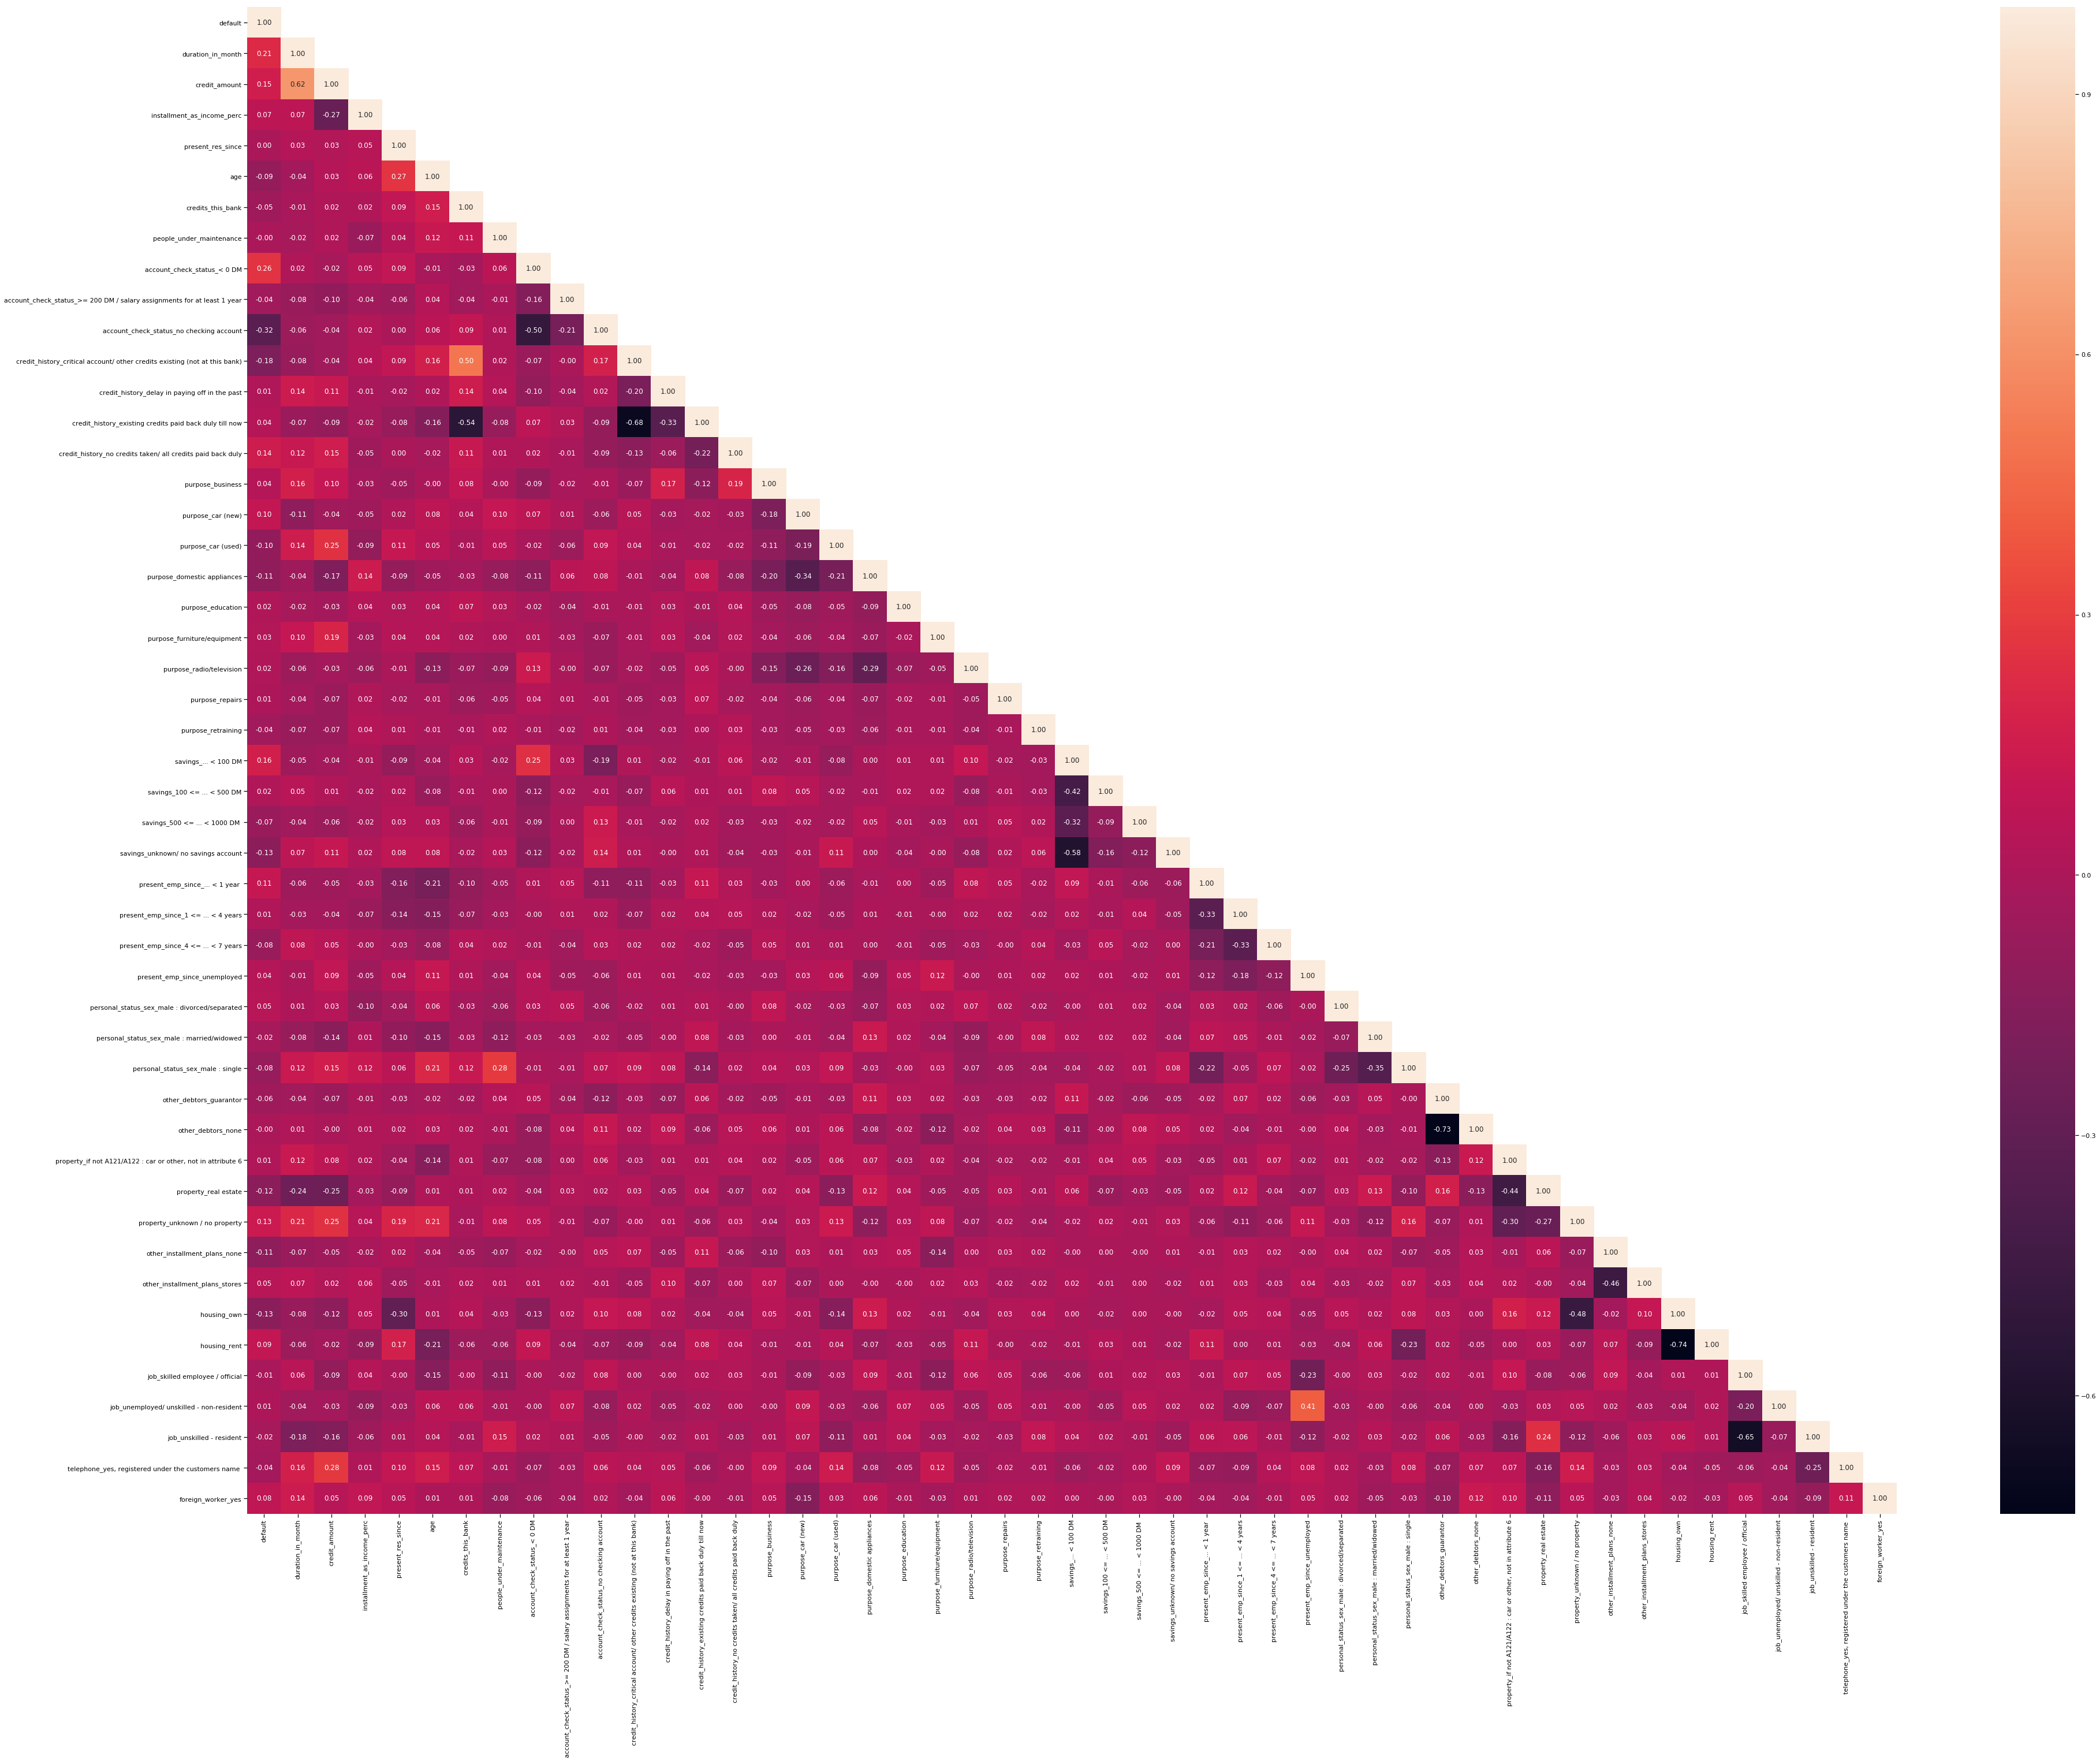

In [51]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = gc1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 5})
plt.figure(figsize=(64,48))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

### Drop the original variables which are converted to dummy

When we pass drop_first = True in get_dummies function, it already drops the original variables.
That step has already been performed above

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [52]:
x = gc1.drop(['default'],axis=1)
y = gc1[['default']]

print(x.shape)
print(y.shape)

(1000, 48)
(1000, 1)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 48)
(300, 48)
(700, 1)
(300, 1)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2, n_estimators = 500, criterion="entropy",random_state=9999)
rfcl = rfcl.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [62]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       214
           1       0.68      0.45      0.55        86

   micro avg       0.78      0.78      0.78       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.77      0.78      0.77       300



In [63]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))


Confusion Matrix:
[[196  18]
 [ 47  39]]


In [64]:
from sklearn.metrics import accuracy_score

In [65]:
from sklearn.metrics import accuracy_score

print("What is the Training Accuracy")
print(accuracy_score(y_train, rfcl.predict(x_train)), "\n")

print("What is the Testing Accuracy")
print(accuracy_score(y_test,rfcl.predict(x_test)))

What is the Training Accuracy
1.0 

What is the Testing Accuracy
0.7833333333333333


In [66]:
# Alternative way to check accuracy score
predicted = rfcl.predict(x_test)
print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test , y_test))

1.0
0.7833333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [67]:
feature_importance = rfcl.feature_importances_
print("the feature_importance is: ", feature_importance)

the feature_importance is:  [0.08907278 0.11521964 0.03855812 0.04010698 0.08687789 0.02126302
 0.01537522 0.03900078 0.01054737 0.05288285 0.02263583 0.01091322
 0.01703491 0.01212418 0.01088784 0.01800316 0.01541311 0.01577456
 0.00569541 0.00269244 0.01476537 0.00309069 0.00145906 0.01910153
 0.00982032 0.00748116 0.01614258 0.01807808 0.01724729 0.0151559
 0.00735704 0.00813193 0.01009041 0.01865575 0.01023359 0.01118119
 0.01805395 0.0209287  0.01349353 0.02023166 0.00685452 0.01630517
 0.01384402 0.01904209 0.00306532 0.01434421 0.02116294 0.00460272]


Text(0.5, 0, 'Relative Importance')

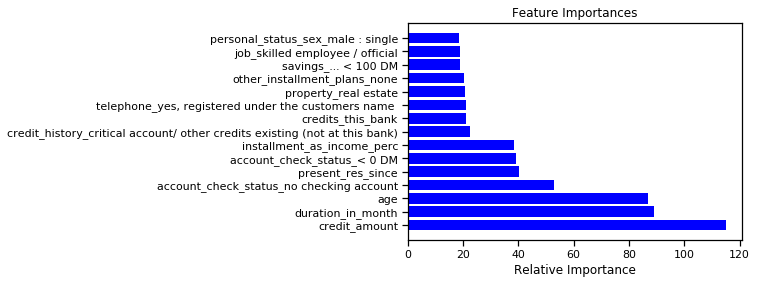

In [143]:
indices = np.argsort(feature_importance)[::-1][:15]
a = gc1.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

General Corss Validation working principle:

* Shuffle the dataset randomly.
* Split the dataset into k groups
  * For each unique group:
  * Take the group as a hold out or test data set
  * Take the remaining groups as a training data set
  * Fit a model on the training set and evaluate it on the test set
  * Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [92]:
# Use below values
num_folds = 10
seed = 77

In [106]:
#Validate the Random Forest model build above using k fold
KF = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
all_accuracies = cross_val_score(estimator=rfcl, X=x_train, y=y_train, cv=KF)

In [107]:
print(all_accuracies)

[0.65714286 0.72857143 0.71428571 0.82857143 0.72857143 0.75714286
 0.81428571 0.68571429 0.72857143 0.78571429]


In [108]:
#Calculate Mean score
print("The mean value is:",scores.mean())

The mean value is: 0.7572192458798919


#### Calculate score standard deviation using std()

In [109]:
print("The standard deviation value is:",scores.std())

The standard deviation value is: 0.028892444407147673


The standard deviation value is low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

# Q8 Print the confusion matrix( 1 Marks)

In [110]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))


Confusion Matrix:
[[196  18]
 [ 47  39]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [111]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       214
           1       0.68      0.45      0.55        86

   micro avg       0.78      0.78      0.78       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.77      0.78      0.77       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [124]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve

In [125]:
roc_curve(y_test, predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

(array([0.        , 0.08411215, 1.        ]),
 array([0.        , 0.45348837, 1.        ]),
 array([2, 1, 0], dtype=int64))

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [126]:
from sklearn.metrics import auc

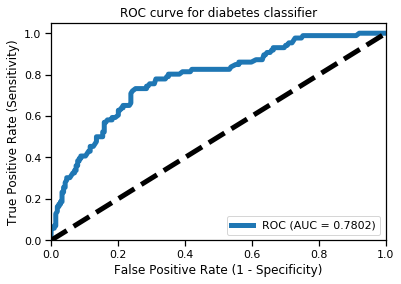

In [147]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
def calculate_roc_curve(y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC curve for diabetes classifier')
    plt.legend(loc="lower right")
    plt.show()

#calculate ROC curve
preds= rfcl.predict_proba(x_test)[:,1]
calculate_roc_curve(y_test, preds,2)

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [128]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [139]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)

In [140]:
#accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', acc.mean())
print('Standard deviation: ', acc.std())

Accuracy Score
Avearge:  0.7666666666666667
Standard deviation:  0.0
